# Forward Model Generators

The `ExoCTK.pal.forward_models` package provides a tool for generating transmission spectra to study  
exoplanet atmospheres.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from ExoCTK.pal import forward_models

### Line Forward Model

The `LineForwardModel` allows for  the generation of transmission spectra with arbitrary Metallicty and C/O ratios.  The model then calculates abundances using either the Fortran Chemical Equilibrium with Applications (CEA) code or through a CEA generated interpolation table.  To instantiate a model the user needs to supply the path to a directory containing opacity tables for the relevant species and either a path to a CEA executable or interpolation table.

In [4]:
model = forward_models.LineForwardModel("/Users/mhill/.exoctk/pal/ABSCOEFF/", cea_path="cea2.x")

To generate a forward model supply values for the relevant parameters.

In [5]:
print(model.__call__.__doc__)


        Calculate a transmission spectrum using Mike Line's CHIMERA code.

        Parameters
        ----------
        Rp: float
            Radius of the planet in units of Jupiter Radius
        Rstar: float
            The stellar radius in units of Solar Radius
        Mp: float
            The planet mass in units of Jupiter Mass
        Tirr: float
            The isothermal temperature at the terminator in Kelvin. If full
            redistribution, this is equilibrium temperature.
        logKir: float
            The TP profile IR opacity, the "vertical" location of the gradient
        logg1: float
            The single channel Vis/IR opacity. Controls the delta T between
            deep T and TOA T
        logMet: float
            The metallicity relative to solar log--solar is 0, 10x=1,
            0.1x = -1 used -1.01*log10(M)+0.6
        logCtoO: float
            The log(C/O) ratio. Log solar is -0.26
        logPQC: float
            CH4, CO, H2O Qunech pressure--

In [6]:
wavelength, transit_depth = model(Rp=1.359, Rstar=1.155, Mp=0.690, Tirr=1200., logKir=-1.5,
                 logg1=-1, logMet=0., logCtoO=-0.26, logPQC=-5, logPQN=-5,
                 logRayAmp=0., RaySlp=4., logPc=1.5)

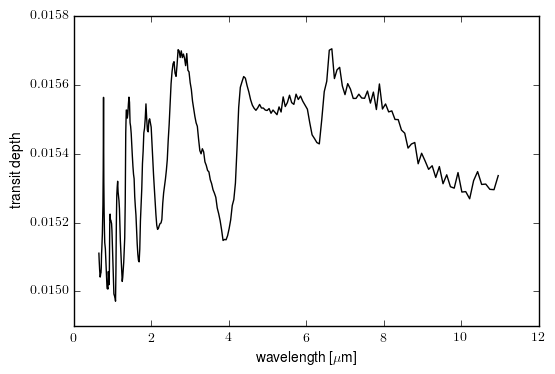

In [7]:
plt.plot(wavelength, transit_depth, 'k')
plt.ylabel('transit depth')
plt.xlabel('wavelength [$\mu$m]')

### Retrieval

The model also supports basic Maximum Likelihood atmospheric retrieval using SciPy's least squares optimizer.

Below we show an example retrieving model parameters from noised data.

In [8]:
import numpy as np

err = np.full_like(transit_depth, 50e-6)
observed_depth = transit_depth + np.random.normal(0, err)

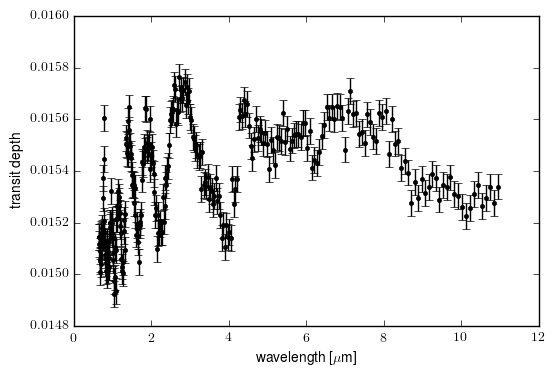

In [9]:
plt.errorbar(wavelength, observed_depth, err, fmt='.k')
plt.ylabel('transit depth')
plt.xlabel('wavelength [$\mu$m]')

To fit the data use the `LineForwardModel.fit` method which returns the `OptimizeResult` object described in the `least_squares` [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html).

In [ ]:
result = model.fit(observed_depth, err)

/Users/mhill/miniconda3/envs/ExoCTK/lib/python3.5/site-packages/ExoCTK-0.0.dev553-py3.5-macosx-10.6-x86_64.egg/ExoCTK/pal/_chimera/fm.py:387: RuntimeWarning: overflow encountered in double_scalars
  Met=10.**x[3]  #metallicity
/Users/mhill/miniconda3/envs/ExoCTK/lib/python3.5/site-packages/ExoCTK-0.0.dev553-py3.5-macosx-10.6-x86_64.egg/ExoCTK/pal/_chimera/fm.py:388: RuntimeWarning: overflow encountered in double_scalars
  CtoO=10.**x[4] #C/O


In [ ]:
_, best_fit_depth = model(*result.x)
plt.plot(wavelength, transit_depth, 'b', label='input model')
plt.errorbar(wavelength, observed_depth, err, fmt='.k', label='data')
plt.plot(wavelength, best_fit_depth, 'r', label='best fit model')
plt.ylabel('transit depth')
plt.xlabel('wavelength [$\mu$m]')
plt.legend()